# **Credit Card Data Similarity and Anomaly Detection**

**Loading Dataset**

In [7]:
import pandas as pd
from pyjarowinkler import distance as jaro_distance
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("card_data.csv")

df.head()

,Customer ID,Card Number,CVV,Expiry Date
0,1,5678 1234 5678 9876,125,12/25
1,2,1234 5678 9876 5432,123,11/24
2,3,1234 5678 9876 5431,125,11/24
3,4,1234 5678 9876 5433,125,01/24
4,5,1234 5678 9876 5431,124,11/24


**Calculating Levenshtein Distance**

In [8]:
def calculate_levenshtein_distance(str1, str2):
    if pd.isna(str1) or pd.isna(str2):  
        return 0
    
    len_s1, len_s2 = len(str1), len(str2)
    dp = [[0] * (len_s2 + 1) for _ in range(len_s1 + 1)]

    for i in range(len_s1 + 1):
        for j in range(len_s2 + 1):
            if i == 0:
                dp[i][j] = j
            elif j == 0:
                dp[i][j] = i
            elif str1[i - 1] == str2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = 1 + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])

    return dp[len_s1][len_s2]

**Calculating Hamming Distance**

In [9]:
def calculate_hamming_distance(str1, str2):
    if len(str1) != len(str2):
        return np.nan  
    return sum(el1 != el2 for el1, el2 in zip(str1, str2))

**Calculating Jaro-Winkler Distance**

In [10]:
def calculate_jaro_winkler_distance(str1, str2):
    return jaro_distance.get_jaro_distance(str1, str2)

**Calculating Distance Metrics for Card Number and CVV**

In [11]:
comparison_value_card = "1234 5678 9876 5432"  
comparison_value_cvv = "123"

df['Levenshtein Card'] = df['Card Number'].apply(lambda x: calculate_levenshtein_distance(str(x), comparison_value_card))
df['Hamming Card'] = df['Card Number'].apply(lambda x: calculate_hamming_distance(str(x), comparison_value_card))
df['Jaro-Winkler Card'] = df['Card Number'].apply(lambda x: calculate_jaro_winkler_distance(str(x), comparison_value_card))

df['Levenshtein CVV'] = df['CVV'].apply(lambda x: calculate_levenshtein_distance(str(x), comparison_value_cvv))
df['Hamming CVV'] = df['CVV'].apply(lambda x: calculate_hamming_distance(str(x), comparison_value_cvv))
df['Jaro-Winkler CVV'] = df['CVV'].apply(lambda x: calculate_jaro_winkler_distance(str(x), comparison_value_cvv))


**Displaying Relevant Columns with Distance Metrics**

In [12]:
df[['Customer ID', 'Card Number', 'Levenshtein Card', 'Hamming Card', 'Jaro-Winkler Card', 
          'CVV', 'Levenshtein CVV', 'Hamming CVV', 'Jaro-Winkler CVV']]

,Customer ID,Card Number,Levenshtein Card,Hamming Card,Jaro-Winkler Card,CVV,Levenshtein CVV,Hamming CVV,Jaro-Winkler CVV
0,1,5678 1234 5678 9876,10,15,0.23,125,1,1,0.22
1,2,1234 5678 9876 5432,0,0,0.00,123,0,0,0.00
2,3,1234 5678 9876 5431,1,1,0.04,125,1,1,0.22
3,4,1234 5678 9876 5433,1,1,0.04,125,1,1,0.22
4,5,1234 5678 9876 5431,1,1,0.04,124,1,1,0.22
...,...,...,...,...,...,...,...,...,...
95,96,1234 5678 9876 5433,1,1,0.04,123,0,0,0.00
96,97,1234 5678 9876 5431,1,1,0.04,126,1,1,0.22
97,98,1234 5678 9876 5432,0,0,0.00,123,0,0,0.00
98,99,1234 5678 9876 5432,0,0,0.00,124,1,1,0.22


**Visualizing Distribution of Distance Metrics for Card Number and CVV**

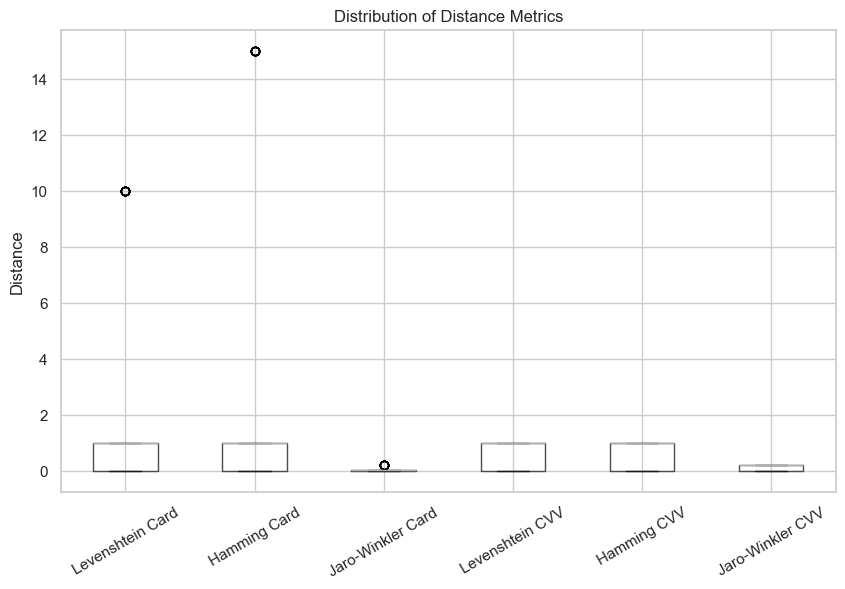

In [ ]:
plt.figure(figsize=(10, 6))
df[['Levenshtein Card', 'Hamming Card', 'Jaro-Winkler Card', 'Levenshtein CVV', 'Hamming CVV', 'Jaro-Winkler CVV']].boxplot()
plt.title('Distribution of Distance Metrics')
plt.ylabel('Distance')
plt.xticks(rotation=30)

plt.show()


**Card Number Distance Comparison using Levenshtein, Hamming, and Jaro-Winkler**

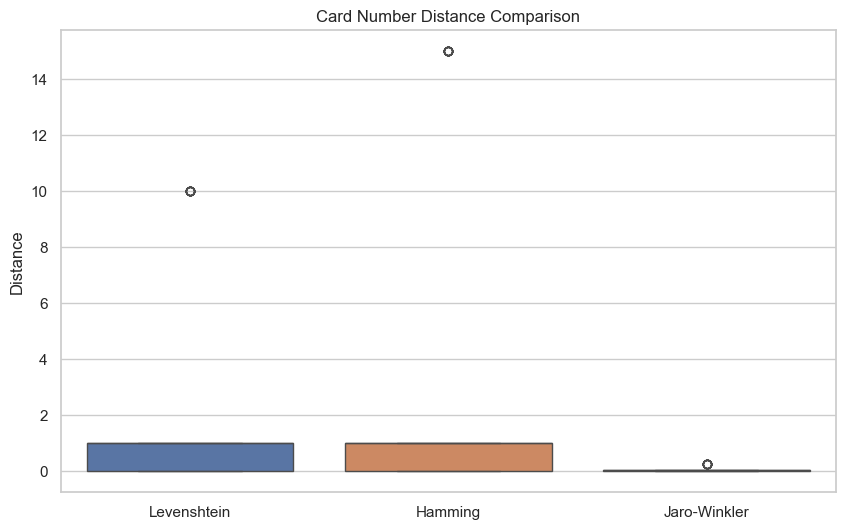

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data=df[['Levenshtein Card', 'Hamming Card', 'Jaro-Winkler Card']])
plt.title("Card Number Distance Comparison")
plt.ylabel("Distance")
plt.xticks([0, 1, 2], ['Levenshtein', 'Hamming', 'Jaro-Winkler'])

plt.show()

**CVV Distance Comparison using Levenshtein, Hamming, and Jaro-Winkler**

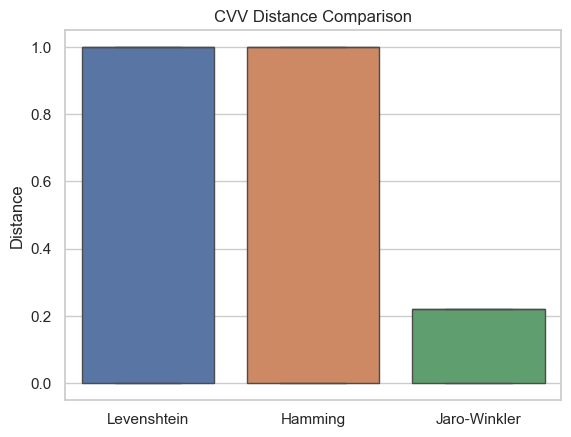

In [ ]:
sns.boxplot(data=df[['Levenshtein CVV', 'Hamming CVV', 'Jaro-Winkler CVV']])
plt.title("CVV Distance Comparison")
plt.ylabel("Distance")
plt.xticks([0, 1, 2], ['Levenshtein', 'Hamming', 'Jaro-Winkler'])

plt.show()

**Card and CVV Similarity Analysis Based on Distance Metrics**

In [ ]:
def analyze_distances(row, card_threshold=2, cvv_threshold=1, jaro_threshold=0.85):
   
    if row['Levenshtein Card'] <= card_threshold and row['Hamming Card'] <= cvv_threshold and row['Jaro-Winkler Card'] >= jaro_threshold:
        card_result = "High Similarity"
        card_reason = "Card numbers appear to be highly similar. Possible reasons: same customer or input error."
    else:
        card_result = "Low Similarity"
        card_reason = "Card numbers are not similar. Possible reasons: different cards or incorrect data entry."
    

    if row['Levenshtein CVV'] <= cvv_threshold and row['Hamming CVV'] <= cvv_threshold and row['Jaro-Winkler CVV'] >= jaro_threshold:
        cvv_result = "High Similarity"
        cvv_reason = "CVV numbers are highly similar. Possible reasons: same customer or input error."
    else:
        cvv_result = "Low Similarity"
        cvv_reason = "CVV numbers are not similar. Possible reasons: different CVVs or incorrect data entry."
    
    return pd.Series([card_result, card_reason, cvv_result, cvv_reason], 
                     index=['Card Similarity', 'Card Reason', 'CVV Similarity', 'CVV Reason'])


df[['Card Similarity', 'Card Reason', 'CVV Similarity', 'CVV Reason']] = df.apply(analyze_distances, axis=1)


df[['Customer ID', 'Card Similarity', 'Card Reason', 'CVV Similarity', 'CVV Reason']]


,Customer ID,Card Similarity,Card Reason,CVV Similarity,CVV Reason
0,1,Low Similarity,Card numbers are not similar. Possible reasons...,Low Similarity,CVV numbers are not similar. Possible reasons:...
1,2,Low Similarity,Card numbers are not similar. Possible reasons...,Low Similarity,CVV numbers are not similar. Possible reasons:...
2,3,Low Similarity,Card numbers are not similar. Possible reasons...,Low Similarity,CVV numbers are not similar. Possible reasons:...
3,4,Low Similarity,Card numbers are not similar. Possible reasons...,Low Similarity,CVV numbers are not similar. Possible reasons:...
4,5,Low Similarity,Card numbers are not similar. Possible reasons...,Low Similarity,CVV numbers are not similar. Possible reasons:...
...,...,...,...,...,...
95,96,Low Similarity,Card numbers are not similar. Possible reasons...,Low Similarity,CVV numbers are not similar. Possible reasons:...
96,97,Low Similarity,Card numbers are not similar. Possible reasons...,Low Similarity,CVV numbers are not similar. Possible reasons:...
97,98,Low Similarity,Card numbers are not similar. Possible reasons...,Low Similarity,CVV numbers are not similar. Possible reasons:...
98,99,Low Similarity,Card numbers are not similar. Possible reasons...,Low Similarity,CVV numbers are not similar. Possible reasons:...
